In [2]:
#Import Dependencies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [3]:
#Importing the raw_data for the city using pandas
city_file = os.path.join("Pyber/raw_data", "city_data.csv")
city_df = pd.read_csv(city_file)
city_df.head(10)

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban
5,South Josephville,4,Urban
6,West Sydneyhaven,70,Urban
7,Travisville,37,Urban
8,Torresshire,70,Urban
9,Lisaville,66,Urban


In [4]:
#Importing the raw_data for the ride using pandas
ride_file = os.path.join("Pyber/raw_data", "ride_data.csv")
ride_df = pd.read_csv(ride_file)
ride_df.head(10)

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673
5,New Jeffrey,2016-02-22 18:36:25,36.01,9757888452346
6,Port Johnstad,2016-06-07 02:39:58,17.15,4352278259335
7,Jacobfort,2016-09-20 20:58:37,22.98,1500221409082
8,Travisville,2016-01-15 17:32:02,27.39,850152768361
9,Sandymouth,2016-11-16 07:27:00,21.61,2389035050524


In [5]:
#drop one duplicate record with same city name, same ride_ids but different number of drivers 
city_df = city_df.drop_duplicates('city', keep = 'first')
city_df.head(10)

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban
5,South Josephville,4,Urban
6,West Sydneyhaven,70,Urban
7,Travisville,37,Urban
8,Torresshire,70,Urban
9,Lisaville,66,Urban


In [6]:
ride_df = ride_df.drop_duplicates('city', keep = 'first')
ride_df.head(10)

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673
5,New Jeffrey,2016-02-22 18:36:25,36.01,9757888452346
6,Port Johnstad,2016-06-07 02:39:58,17.15,4352278259335
7,Jacobfort,2016-09-20 20:58:37,22.98,1500221409082
8,Travisville,2016-01-15 17:32:02,27.39,850152768361
9,Sandymouth,2016-11-16 07:27:00,21.61,2389035050524


In [7]:
#merging the city df and the ride df together, using the same heading (City) for both city_data and ride_data
merged_df = city_df.merge(ride_df, on = 'city')
merged_df.head(10)


,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Nguyenbury,8,Urban,2016-07-09 04:42:44,6.28,1543057793673
2,East Douglas,12,Urban,2016-10-01 19:07:00,16.36,8450340983211
3,West Dawnfurt,34,Urban,2016-07-24 15:18:57,30.80,3839329929610
4,Rodriguezburgh,52,Urban,2016-09-05 05:20:39,4.54,9650770953139
5,South Josephville,4,Urban,2016-06-01 05:15:38,28.33,7956832876432
6,West Sydneyhaven,70,Urban,2016-08-02 21:18:44,12.87,7994760397230
7,Travisville,37,Urban,2016-01-15 17:32:02,27.39,850152768361
8,Torresshire,70,Urban,2016-10-29 12:28:18,23.50,6168304478087
9,Lisaville,66,Urban,2016-01-06 03:50:10,19.60,239487697551


In [15]:
#grouping the city by its name(city and ride DataFrame)
by_city = merged_df.groupby('city')

# var holding avg fare by city
avg_fare = by_city.mean()['fare']

#var holding rides by city
ride_count = by_city['ride_id'].count()

# num of drivers
driver_count = by_city.mean()['driver_count']

# city type data
city_type = city_df.set_index('city')['type']

# dataframe from above series
city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})



In [9]:
#number of group by city name
by_city = merged_df.groupby('city')
by_city

In [10]:
#calculating and getting the variable holding avg fare by city
avg_fare_df = by_city.mean()['fare']
avg_fare_df.head(10)

city
Alvarezhaven    31.93
Alyssaberg      35.61
Anitamouth      43.54
Antoniomouth    19.91
Aprilchester    20.29
Arnoldview      38.73
Campbellport    41.53
Carrollbury     25.00
Carrollfort      6.45
Clarkstad       44.96
Name: fare, dtype: float64

In [11]:
#varable holding rides by city
ride_count = by_city['ride_id'].count()
ride_count.head(10)

city
Alvarezhaven    1
Alyssaberg      1
Anitamouth      1
Antoniomouth    1
Aprilchester    1
Arnoldview      1
Campbellport    1
Carrollbury     1
Carrollfort     1
Clarkstad       1
Name: ride_id, dtype: int64

In [12]:
# determining number of drivers
driver_count = by_city.mean()['driver_count']
driver_count.head(10)

city
Alvarezhaven    21
Alyssaberg      67
Anitamouth      16
Antoniomouth    21
Aprilchester    49
Arnoldview      41
Campbellport    26
Carrollbury      4
Carrollfort     55
Clarkstad       21
Name: driver_count, dtype: int64

In [14]:
# city type data
city_type = city_df.set_index('city')['type']
city_type.head(10)

city
Kelseyland           Urban
Nguyenbury           Urban
East Douglas         Urban
West Dawnfurt        Urban
Rodriguezburgh       Urban
South Josephville    Urban
West Sydneyhaven     Urban
Travisville          Urban
Torresshire          Urban
Lisaville            Urban
Name: type, dtype: object

In [121]:
# dataframe from above series
city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})
city_info.head(10)

,Average Fare,Number of Drivers,Number of Rides,Type of City
Alvarezhaven,23.928710,21.0,31,Urban
Alyssaberg,20.609615,67.0,26,Urban
Anitamouth,37.315556,16.0,9,Suburban
Antoniomouth,23.625000,21.0,22,Urban
Aprilchester,21.981579,49.0,19,Urban
Arnoldview,25.106452,41.0,31,Urban
Campbellport,33.711333,26.0,15,Suburban
Carrollbury,36.606000,4.0,10,Suburban
Carrollfort,25.395517,55.0,29,Urban
Clarkstad,31.051667,21.0,12,Suburban


In [122]:
city_info.sort_values('Number of Drivers', ascending = False).head(10)

,Average Fare,Number of Drivers,Number of Rides,Type of City
Davidtown,22.978095,73.0,21,Urban
South Bryanstad,24.598571,73.0,21,Urban
Williamshire,26.990323,70.0,31,Urban
West Sydneyhaven,22.368333,70.0,18,Urban
Torresshire,24.207308,70.0,26,Urban
Fosterside,23.034583,69.0,24,Urban
Spencertown,23.681154,68.0,26,Urban
Alyssaberg,20.609615,67.0,26,Urban
Smithhaven,22.788889,67.0,27,Urban
Lisaville,28.428929,66.0,28,Urban


In [16]:
#separated dfs for city categories
rural_dfs = city_info[city_info['Type of City'] == 'Rural']
rural_dfs.head(10)

,Average Fare,Number of Drivers,Number of Rides,Type of City
East Leslie,19.26,9,1,Rural
East Stephen,22.43,6,1,Rural
East Troybury,45.12,3,1,Rural
Erikport,11.76,3,1,Rural
Hernandezshire,58.95,10,1,Rural
Horneland,12.63,8,1,Rural
Jacksonfort,10.33,6,1,Rural
Kennethburgh,24.43,3,1,Rural
Kinghaven,20.53,3,1,Rural
Manuelchester,49.62,7,1,Rural


In [124]:
suburban_dfs = city_info[city_info['Type of City'] == 'Suburban']
suburban_dfs.head(10)

,Average Fare,Number of Drivers,Number of Rides,Type of City
Anitamouth,37.315556,16.0,9,Suburban
Campbellport,33.711333,26.0,15,Suburban
Carrollbury,36.606000,4.0,10,Suburban
Clarkstad,31.051667,21.0,12,Suburban
Conwaymouth,34.591818,18.0,11,Suburban
East Cherylfurt,31.416154,9.0,13,Suburban
East Jenniferchester,32.599474,22.0,19,Suburban
Floresberg,32.310000,7.0,10,Suburban
Jasonfort,27.831667,25.0,12,Suburban
Jeffreyton,33.165556,8.0,18,Suburban


In [125]:
urban_dfs = city_info[city_info['Type of City'] == 'Urban']
urban_dfs.head(10)

,Average Fare,Number of Drivers,Number of Rides,Type of City
Alvarezhaven,23.928710,21.0,31,Urban
Alyssaberg,20.609615,67.0,26,Urban
Antoniomouth,23.625000,21.0,22,Urban
Aprilchester,21.981579,49.0,19,Urban
Arnoldview,25.106452,41.0,31,Urban
Carrollfort,25.395517,55.0,29,Urban
Davidtown,22.978095,73.0,21,Urban
Davistown,21.497200,25.0,25,Urban
East Douglas,26.169091,12.0,22,Urban
East Erin,24.478214,43.0,28,Urban


In [126]:
#Coloring the city categories(Urban,Suburban and Rural) 
city_color = {'Urban': color_scheme['Gold'], 
              'Suburban': color_scheme['Light Sky Blue'], 
              'Rural': color_scheme['Light Coral']}

plt.suptitle('Pyber ride sharing graph')

Text(0.5,0.98,'Pyber ride sharing graph')

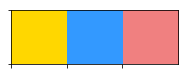

In [127]:
#defining the Pybar color scheme in a Dictionary 
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#3399FF', 'Light Coral':'#F08080'}
sns.palplot(sns.color_palette(color_scheme.values())) 
plt.show()

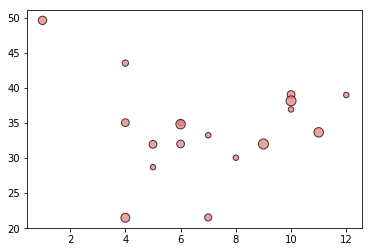

In [128]:
# three scatter plots for each city type
#scatter plots for the Ride Share in Rural Area
plt.scatter(rural_dfs['Number of Rides'], rural_dfs['Average Fare'], s = rural_dfs['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.show()

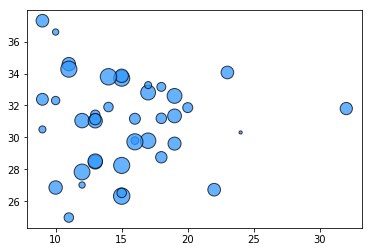

In [129]:
#scatter plots for the Ride Share in Suburban Area
plt.scatter(suburban_dfs['Number of Rides'], suburban_dfs['Average Fare'], s = suburban_dfs['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.show()

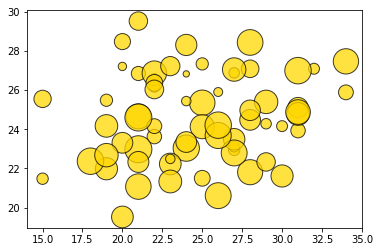

In [130]:
#scatter plots for the Ride Share in urban Area
plt.scatter(urban_dfs['Number of Rides'], urban_dfs['Average Fare'], s = urban_dfs['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)
plt.show()

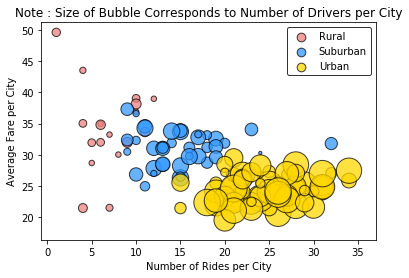

In [131]:
#Merging the three Scatter plots together (Rural, Suburban and the Urban city) and their legends
plt.scatter(rural_dfs['Number of Rides'], rural_dfs['Average Fare'], s = rural_dfs['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban_dfs['Number of Rides'], suburban_dfs['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban_dfs['Number of Rides'], urban_dfs['Average Fare'], s = urban_dfs['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)
#print scatter plot
plt.title('Note : Size of Bubble Corresponds to Number of Drivers per City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')



lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.show()

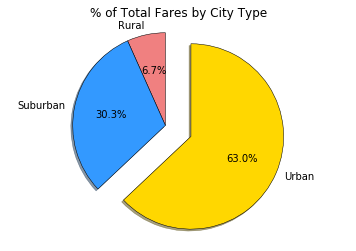

In [132]:

#group by type to be used by all pie charts
by_type = merged_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
fare_sum = by_type.sum()['fare']

#pie chart build
labels = fare_sum.index

#colors and exploe the same for all pie charts, reference here
colors = [city_color[n] for n in labels]
explode = [0 , 0, .3]
plt.pie(fare_sum, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

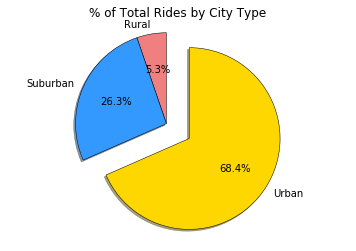

In [133]:
# number of ride per city type
 
ride_sum = by_type.count()['ride_id']

labels = ride_sum.index
plt.pie(ride_sum, startangle = 90, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()

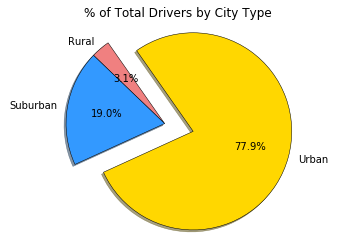

In [134]:
# number of driver per city type

driver_sum = city_df.groupby('type').sum()['driver_count']

labels = driver_sum.index
plt.pie(driver_sum, startangle = 125, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()

In [ ]:
#MY OBERSERVATIONS
#1)  Loooking at the Data from the City DataFrame and the RIde DataFrame i observerd that the Percentage of Ride taking in Urban Cities is Far more compared to Rural and Surburban. 

#2) Also Looking at our Scatter Plot graphs, i discovered that number of Rides and Average fare in Rural Cities is way less compared to Surburban especially the Urban Cities.

#3) Our Pie Chart/Graph Said it all about the Total Drivers and Total Fare Operating in Different Cities, Its very Obvious that The Urban Cities has more Drivers and More Number of Rides taking by Rider. 
#Also the Surburban got a little bit close in percentage for Drivers and total number of Rides.
```
